<a href="https://colab.research.google.com/github/Vigneshthanga/258-Deep-Learning/blob/master/Ungraded5/BasicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## Load Fashion MNIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Claas Labels

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Train Data shape

In [4]:
xtrain.shape

(60000, 28, 28)

## Label data shape

In [5]:
len(ytrain)

60000

## Labels

In [6]:
ytrain

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Test Shape

In [7]:
xtest.shape

(10000, 28, 28)

In [8]:
len(ytest)

10000

## Visualization

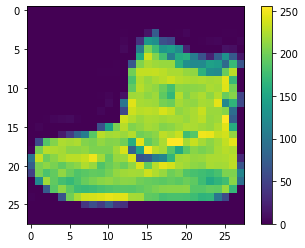

In [9]:
plt.figure()
plt.imshow(xtrain[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Scale the train and test images

In [0]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

## Visualizing train data with labels

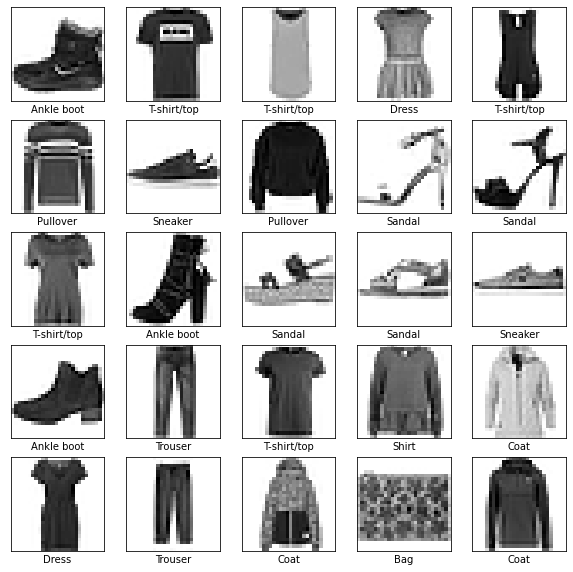

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[ytrain[i]])
plt.show()

## Model Definition

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## Model Compilation

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

## Model Training

In [14]:
model.fit(xtrain, ytrain, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5021 - accuracy: 0.8227
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8634
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3394 - accuracy: 0.8767
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3126 - accuracy: 0.8851
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8917
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2824 - accuracy: 0.8950
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2711 - accuracy: 0.8987
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2605 - accuracy: 0.9041
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2502 - accuracy: 0.9066
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

## Model Evaluation

In [15]:
test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4893 - accuracy: 0.8861

Test accuracy: 0.8860999941825867


## Applying softmax on the predicted values

In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
ypred = probability_model.predict(xtest)

In [19]:
ypred[0]

array([7.3651194e-18, 8.4983525e-16, 6.5112116e-25, 2.1137012e-27,
       1.8184377e-19, 1.4401125e-10, 1.1200971e-20, 7.0922925e-07,
       1.5377890e-17, 9.9999928e-01], dtype=float32)

## Applying argmax function to get the class having the highest probability

In [20]:
np.argmax(ypred[0])

9

In [21]:
ytest[0]

9

## Defining utility functions to plot the images and the corresponding predcition probability

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Visualizing one sample

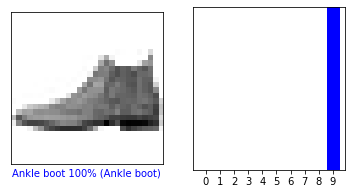

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, ypred[i], ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, ypred[i],  ytest)
plt.show()

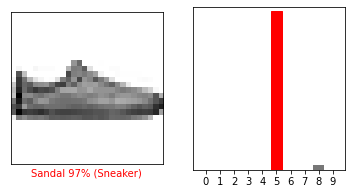

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, ypred[i], ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, ypred[i],  ytest)
plt.show()

## Visualizing many samples with the prediction probability

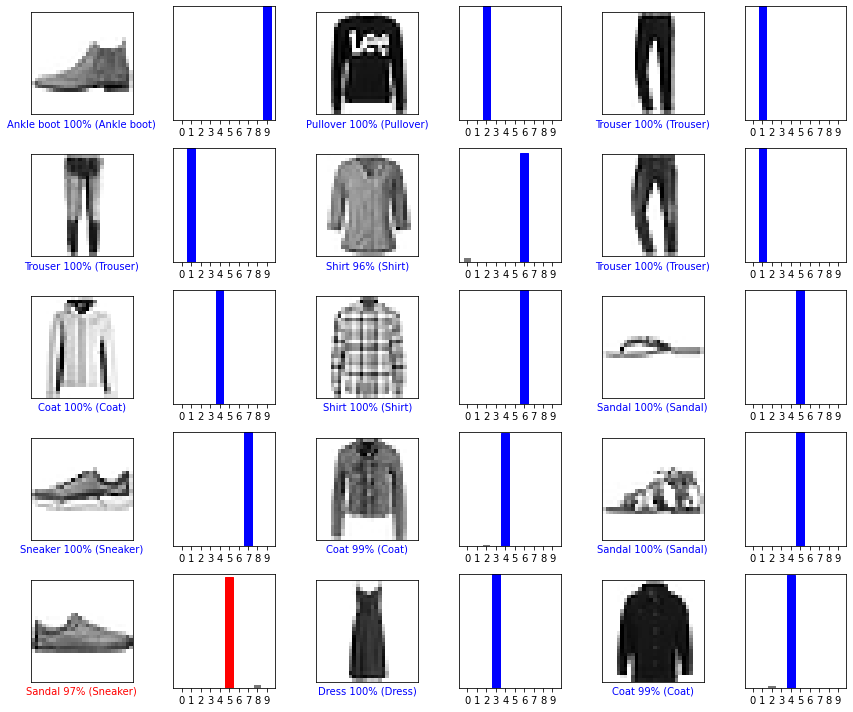

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, ypred[i], ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, ypred[i], ytest)
plt.tight_layout()
plt.show()

In [30]:
img = xtest[1]
print(img.shape)

(28, 28)


In [31]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [32]:
ypred_single = probability_model.predict(img)
print(ypred_single)

[[4.8591178e-06 6.7043417e-21 9.9999499e-01 5.9668552e-21 1.2164678e-07
  1.3379533e-21 5.6420198e-08 3.7241814e-33 7.6339004e-23 1.6025403e-24]]


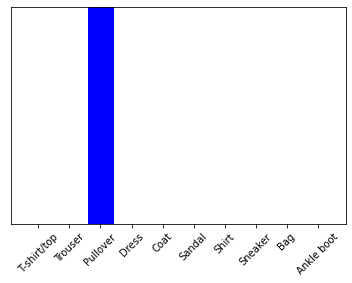

In [35]:
plot_value_array(1, ypred_single[0], ytest)
_ = plt.xticks(range(10), class_names, rotation=45)